<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-зарплат" data-toc-modified-id="Анализ-зарплат-1">Анализ зарплат</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-чтение-датасета" data-toc-modified-id="Импорт-библиотек-и-чтение-датасета-1.1">Импорт библиотек и чтение датасета</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2">Загрузка данных</a></span></li></ul></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2">Задание</a></span><ul class="toc-item"><li><span><a href="#Распределение-зарплат" data-toc-modified-id="Распределение-зарплат-2.1">Распределение зарплат</a></span></li><li><span><a href="#Анализ-факторов" data-toc-modified-id="Анализ-факторов-2.2">Анализ факторов</a></span><ul class="toc-item"><li><span><a href="#пол-/-sex" data-toc-modified-id="пол-/-sex-2.2.1">пол / sex</a></span></li><li><span><a href="#тип-населенного-пункта-/-town_type" data-toc-modified-id="тип-населенного-пункта-/-town_type-2.2.2">тип населенного пункта / town_type</a></span></li><li><span><a href="#семейное-положение-/-marital_status" data-toc-modified-id="семейное-положение-/-marital_status-2.2.3">семейное положение / marital_status</a></span></li><li><span><a href="#проффессиональная-группа-/-professional_group" data-toc-modified-id="проффессиональная-группа-/-professional_group-2.2.4">проффессиональная группа / professional_group</a></span></li><li><span><a href="#образование-/-finished_education" data-toc-modified-id="образование-/-finished_education-2.2.5">образование / finished_education</a></span></li><li><span><a href="#индустрия-/-industry" data-toc-modified-id="индустрия-/-industry-2.2.6">индустрия / industry</a></span></li></ul></li><li><span><a href="#Кодировка-категориальных-признаков" data-toc-modified-id="Кодировка-категориальных-признаков-2.3">Кодировка категориальных признаков</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.4">Линейная регрессия</a></span></li><li><span><a href="#Корректность-линейной-регрессии" data-toc-modified-id="Корректность-линейной-регрессии-2.5">Корректность линейной регрессии</a></span></li></ul></li></ul></div>

# Анализ зарплат

Эта домашняя работа будет основана на основе данных РМЭЗ НИУ ВШЭ
- [об исследовании подробнее](https://www.hse.ru/rlms/)
- [данные за разные года](https://www.hse.ru/rlms/spss)
- [опросник для 25-ой волны](https://www.hse.ru/data/2018/11/15/1169536982/r25a_user_1216.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/question)
- [кодировка переменных 25-ой волны](https://www.hse.ru/data/2019/09/09/1170599989/R25_ind_codebook_09.2019.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/code)

## Импорт библиотек и чтение датасета

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

## Загрузка данных

Далее идет небольшая предобработка датасета, это код можно просто запустить

In [ ]:
# тип данных в колонках
cols = {
    'status':'category',
    'popul':'category',
    'u_age':float,
    'uh5':'category',
    'u_marst':'category',
    'u_diplom':'category',
    'u_educ':'category',
    'u_occup08':'category',
    'uj1':'category',
    'uj4.1':'category',
    'uj13.2':float
}


In [ ]:
# как они будут переименованы
rename_cols={
    'status':'town_type',
    'popul':'population',
    'u_age':'age',
    'uh5':'sex',
    'u_marst':'marital_status',
    'u_diplom':'finished_education',
    'u_educ':'education',
    'u_occup08':'professional_group',
    'uj1':'employed',
    'uj4.1':'industry',
    'uj13.2':'wage'}


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Math & Natural & Finance/Math/Statistics/data/r25iall26с.csv', usecols=cols.keys(), dtype=cols, 
                 na_values=['#NULL!','NA','99999999','99999998','99999997'], 
                 low_memory=False)
df = df.rename(columns = rename_cols)
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,3,12187,43.0,2,21,6,4,2,1,10,40000.0
1,3,12187,61.0,5,16,4,5,2,1,12,28000.0
2,3,12187,32.0,5,10,3,4,2,1,14,NaN
3,3,12187,30.0,NaN,9,3,2,1,5,NaN,NaN
4,3,12187,72.0,NaN,7,2,1,2,5,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  category
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(9), float64(2)
memory usage: 485.0 KB


In [ ]:
df.describe()

,age,wage
count,18755.000000,7025.000000
mean,38.184537,24324.848114
std,22.702215,18163.937524
min,0.000000,0.000000
25%,20.000000,14000.000000
50%,37.000000,20000.000000
75%,56.000000,30000.000000
max,102.000000,400000.000000


In [ ]:
# for j in df.dtypes[df.dtypes=='category'].index:
#     print('\n',j,list(df[j].unique()))

In [ ]:
# как будут переименованы категории

town_type={1:'Областной центр',
2:'Город',
3:'Посёлок городского типа' ,
4:'Село',
}

marital_status={
1: 'Никогда в браке не состояли',
2: 'Состоите в зарегистрированном браке',
3: 'Живете вместе, но не зарегистрированы',
4: 'Разведены и в браке не состоите',
5: 'Bдовец (вдова)',
6: 'Официально зарегистрированы, но вместе не проживают',
}

sex={
1: 'М',
2: 'Ж',
}


professional_group=[
'Военнослужащие',
'Законодатели; крупные чиновники; руководители высш. и сред. звена',
'Специалисты высшего уровня квалификации',
'Специалисты среднего уровня квалификации; чиновники',
'Служащие офисные и по обслуживанию клиентов',
'Работники сферы торговли и услуг',
'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства',
'Квалифицированные рабочие, занятые ручным трудом',
'Квалифицированные рабочие, исп. машины и механизмы',
'Неквалифицированные рабочие всех отраслей',
]
professional_group = {x:professional_group[x] for x in range(len(professional_group))}


finished_education = ['окончил 0 - 6 классов',
 'незаконченное среднее образование (7 - 8 кл)',
 'незаконченное среднее образование (7 - 8 кл) + что-то еще',
 'законченное среднее образование',
 'законченное среднее специальное образование',
 'законченное высшее образование и выше']
finished_education = {x:finished_education[x-1] for x in range(1,len(finished_education)+1)}


education = ['0 классов школы',
'1 класс школы',
'2 класса школы',
'3 класса школы',
'4 класса школы',
'5 классов школы',
'6 классов школы',
'7 классов школы',
'8 классов школы',
'9 классов школы',
'7-9 классов школы (незак. средн) +     без диплома',
'7-9 классов школы (незак. средн) +     с дипломом',
'10 и более классов школы без аттестата о среднем образовании',
'7-9 классов школы (незак. среднее) и менее 2 лет в техникуме',
'среднее образование - есть аттестат о ср. образовании',
'10 и более классов школы и какое-либо професс. обр. без диплома',
'10 и более классов школы и какое-либо професс. обр. с дипломом',
'10 и более классов школы и техникум без диплома',
'техникум с дипломом',
'1-2 года в высшем учебном заведении',
'3 и более лет в высшем учебном заведении',
'есть диплом о высшем образовании',
'аспирантура и т.п. без диплома',
'аспирантура и т.п. с дипломом',]
education = {x:education[x] for x in range(len(education))}

industry = ['ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ',
'ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ',
'ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС',
'НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ',
'ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ',
'СТРОИТЕЛЬСТВО',
'ТРАНСПОРТ, СВЯЗЬ',
'СЕЛЬСКОЕ ХОЗЯЙСТВО',
'ОРГАНЫ УПРАВЛЕНИЯ',
'ОБРАЗОВАНИЕ',
'НАУКА, КУЛЬТУРА',
'ЗДРАВООХРАНЕНИЕ',
'АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ',
'ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ',
'ФИНАНСЫ И СТРАХОВАНИЕ',
'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ',
'ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО',
'ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ',
'ДРУГОЕ',]
industry=[x.lower().capitalize() for x in industry]
industry = {x:industry[x-1] for x in range(1,1+len(industry))}

employed = ['Вы сейчас работаете ',
'Вы находитесь в отпуске - декретном или по уходу за ребёнком до 3-х лет ',
'Вы находитесь в любом другом оплачиваемом отпуске ',
'Вы находитесь в неоплачиваемом отпуске ',
'Или у Вас сейчас нет работы',]
employed = {x:employed[x-1] for x in range(1,1+len(employed))}


In [ ]:
df['population'] = df['population'].astype(int)

In [ ]:
df['industry'] = np.where(df['industry'].astype(float)>19,19,df['industry'])
df['industry'] = df['industry'].astype('category')
df['industry'].head()

0     10
1     12
2     14
3    NaN
4    NaN
Name: industry, dtype: category
Categories (19, object): [19, '1', '10', '11', ..., '6', '7', '8', '9']

In [ ]:
cats = df.dtypes[df.dtypes=='category'].index
for col in cats:
    dict_j = globals()[col]
#     print('\n',col,dict_j,sep='\n')
#     df[col] = df[col].astype('category').cat.rename_categories(dict_j)
    df[col] = df[col].astype(float).replace(dict_j).astype('category')


In [ ]:
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,Посёлок городского типа,12187,43.0,Специалисты высшего уровня квалификации,есть диплом о высшем образовании,законченное высшее образование и выше,Разведены и в браке не состоите,Ж,Вы сейчас работаете,Образование,40000.0
1,Посёлок городского типа,12187,61.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Bдовец (вдова),Ж,Вы сейчас работаете,Здравоохранение,28000.0
2,Посёлок городского типа,12187,32.0,Работники сферы торговли и услуг,7-9 классов школы (незак. средн) + без дип...,незаконченное среднее образование (7 - 8 кл) +...,Разведены и в браке не состоите,Ж,Вы сейчас работаете,"Торговля, бытовое обслуживание",NaN
3,Посёлок городского типа,12187,30.0,NaN,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Состоите в зарегистрированном браке,М,Или у Вас сейчас нет работы,NaN,NaN
4,Посёлок городского типа,12187,72.0,NaN,7 классов школы,незаконченное среднее образование (7 - 8 кл),Никогда в браке не состояли,Ж,Или у Вас сейчас нет работы,NaN,NaN


In [ ]:
df.employed

0               Вы сейчас работаете 
1               Вы сейчас работаете 
2               Вы сейчас работаете 
3        Или у Вас сейчас нет работы
4        Или у Вас сейчас нет работы
                     ...             
18751                             NaN
18752           Вы сейчас работаете 
18753                             NaN
18754                             NaN
18755                             NaN
Name: employed, Length: 18756, dtype: category
Categories (5, object): ['Вы находитесь в любом другом оплачиваемом отп..., 'Вы находитесь в неоплачиваемом отпуске ',
                         'Вы находитесь в отпуске - декретном или по ух..., 'Вы сейчас работаете ', 'Или у Вас сейчас нет работы']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  int64   
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 589.0 KB


# Задание

| Задание                            | Баллы          |
|------------------------------------|----------------|
| Добавление новых переменных        |             5 |
| Распределение зарплат              |             15 |
| Анализ факторов                    |             50+50 |
| Кодировка категориальных признаков |             10 |
| Линейная регрессия                 |             10 |
| Корректность линейной регрессии    |             10 |
| Всего                              |            100 |

## Распределение зарплат

Изучите опросник или кодировку переменных в этом исследовании и добавьте 1-3 переменных, которые могли бы влиять на зарплату.  

*Сочетания переменных* `marital_status`, `sex`, `employed` *в некотором порядке - пример сочетания имеющихся переменных, которые имеют влияние на ЗП, например:*  
* `marital_status` $\cdot$ `sex`;
* `employed` $\cdot$ `sex`.

Приведённые сочетания - это, как кажется, наиболее информативные из возможных.

Исследуйте распределение зарплат в России. 

- Похоже ли распределение на нормальное? А после логарифмирования? Воспользуйтесь формальными критериями для выводов. Если бы выборка была меньше, изменились бы выводы?


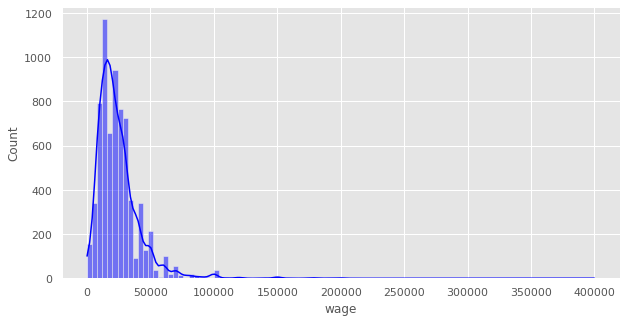

In [ ]:
sns.histplot(df.wage.dropna(), bins=100, kde = True, color = 'blue')

[тесты на нормальность](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

In [ ]:
k2, p = stats.normaltest(df.wage.dropna())

print(k2, p)

6446.148379257982 0.0


In [ ]:
stats.chisquare(df.wage.dropna())

Power_divergenceResult(statistic=95269605.0030705, pvalue=0.0)

Распределение явно *skewed to the right*. 

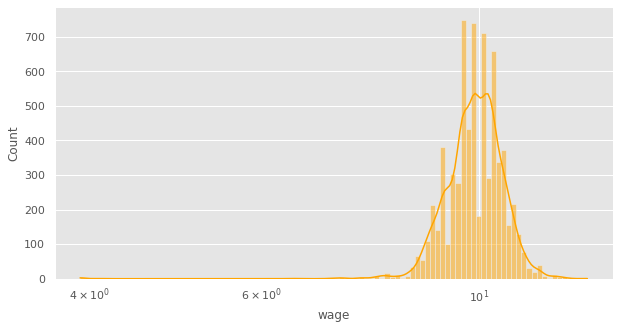

In [ ]:
sns.histplot(np.log(df[df['wage'] > 0].wage.dropna()), bins=100, kde = True, color = 'orange', log_scale = True)

In [ ]:
k2, p = stats.normaltest(np.log( df[df['wage'] > 0].wage.dropna() ) )

print(k2, p)

1712.941440326295 0.0


In [ ]:
stats.chisquare(np.log( df[df['wage'] > 0].wage.dropna() ))

Power_divergenceResult(statistic=295.67206791244183, pvalue=1.0)

- Постройте подходящие гистограммы. Проанализируйте qq-график для исходной переменной и логарифмированной. Можно ли предположить, что логарифм зарплат имеет нормальное распределение?

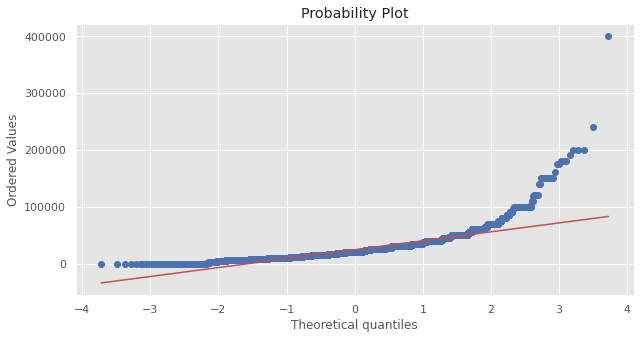

In [ ]:
stats.probplot(df.wage.dropna(), dist="norm", plot=plt);

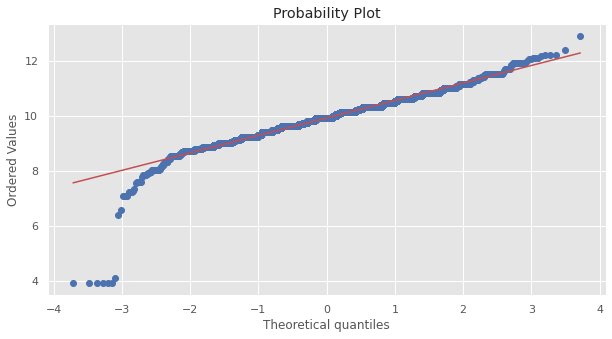

In [ ]:
stats.probplot(np.log(df[df['wage'] > 0].wage.dropna()),
               dist="norm", plot=plt);

QQ-chart для логарифмированной переменной определённо лучше ложится на "нормальную прямую", но всё портят тяжёлые хвосты. Над этим надо поработать.

## Анализ факторов

**Часть 1**
- Для начала оставьте в выборке только работающих (колонка - employed)
- Проанализируйте влияние каждого фактора на зарплату
    - пол / sex
    - тип населенного пункта / town_type
    - семейное положение / marital_status
    - проффессиональная группа / professional_group
    - образование / finished_education
    - индустрия / industry
- Для анализа взаимосвязи постройте подходящие графики 
    - например, боксплоты зарплаты в зависимости от категорий или распределение зарплаты в зависимости от бинарных переменных
    - вы можете рассмотреть, как логарифм зарплаты, так и ее оригинальное значение – в зависимости от того, что решили делать с целевой переменной и как лучше видна взаимосвязь или её отсутствие
- Напишите **краткие** выводы о наличии взаимосвязи (к более развернутым выводам стоит прийти после построения регрессии)


---

Следующее задание будет связано с подготовкой датасета к one-hot кодированию, поэтому уже на этом этапе имеет смысл подумать о том, как будут закодированы категориальные факторы

Особое внимание нужно обратить на категории, которых мало в выборке. Их стоит удалить или укрупнить до собирательной категории `Иное`. Например тех, кто закончил `0-6 классов`, почти нет в выборке, коэффицент для этой категории будет не значим, поэтому эту категорию можно заранее удалить (например, удалить эти наблюдения как выбросы).

Рекомендуется проанализировать подобную таблицу для каждого фактора или нанести значения из неё на график

<a href="https://ibb.co/NFRYmxq"><img src="https://i.ibb.co/rQ9yckh/image.png" alt="image" border="0"></a>



In [ ]:
# sex
df.groupby(['sex'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Ж,3810.0,20345.758005,15165.334798,0.0,12000.0,17000.0,25000.0,200000.0
М,3215.0,29040.348367,20185.695606,0.0,17000.0,25000.0,35000.0,400000.0


In [ ]:
#df.groupby(['sex']).count()

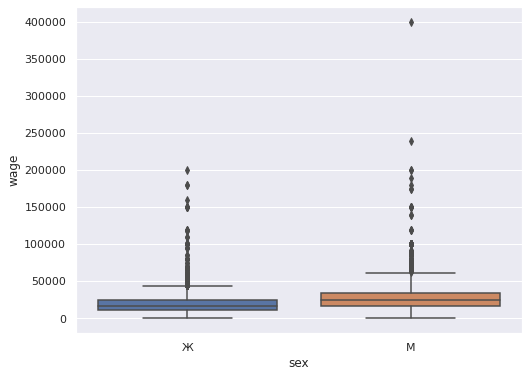

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x="sex", y="wage", data=df)

**Краткие выводы по влиянию пола респондента** `sex`: в среднем мужчины зарабатывают на $45\%$ больше женщин. по графику boxplot видно, что данная разница системна - разница в каждой точке квартиля сооветствует $\approx$ тому же значению. 

In [ ]:
# town_type
df.groupby(['town_type'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
town_type,,,,,,,,
Город,2105.0,23593.758195,17163.727382,0.0,13000.0,20000.0,30000.0,200000.0
Областной центр,3074.0,27847.998373,20779.297504,0.0,16000.0,25000.0,35000.0,400000.0
Посёлок городского типа,418.0,23087.081340,14506.946177,0.0,13000.0,20000.0,30000.0,150000.0
Село,1428.0,18180.707283,11513.029408,0.0,10000.0,15000.0,24000.0,100000.0


In [ ]:
#df.groupby(['town_type']).count()

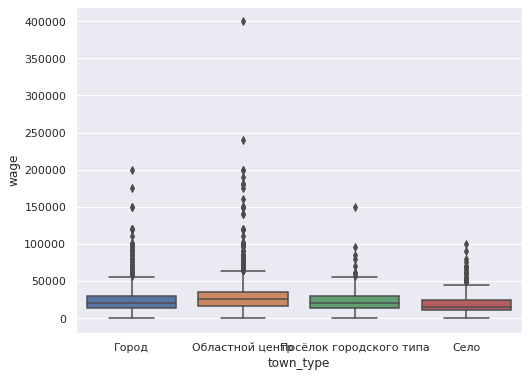

In [ ]:
ax = sns.boxplot(x="town_type", y="wage", data=df)

**Краткие выводы по влиянию места проживания** `town_type`: ожидаемо, зарплаты (в среднем, по квантилям, максимальная) растут от сёл к большим населённым пунктам. Но отчасти неожиданно, что Областные центры имеют большую зарплату, чем города, что видно и по наличию выбросов в районе 400к: некое прояснение этого можно будет посмотреть на картинке ао отраслям. 

In [ ]:
# marital_status
df.groupby(['marital_status'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Bдовец (вдова),303.0,17495.521452,14986.023589,0.0,10000.0,15000.0,20000.0,200000.0
"Живете вместе, но не зарегистрированы",948.0,23215.717300,15259.529396,0.0,15000.0,20000.0,30000.0,150000.0
Никогда в браке не состояли,831.0,23179.651023,14927.685446,0.0,14750.0,20000.0,30000.0,180000.0
"Официально зарегистрированы, но вместе не проживают",57.0,23961.403509,14122.774849,0.0,15000.0,21000.0,30000.0,70000.0
Разведены и в браке не состоите,622.0,23958.167203,17675.381239,0.0,14000.0,20000.0,30000.0,150000.0
Состоите в зарегистрированном браке,4253.0,25355.830002,19497.208423,0.0,14000.0,20000.0,30000.0,400000.0


In [ ]:
#df.groupby(['marital_status']).count()

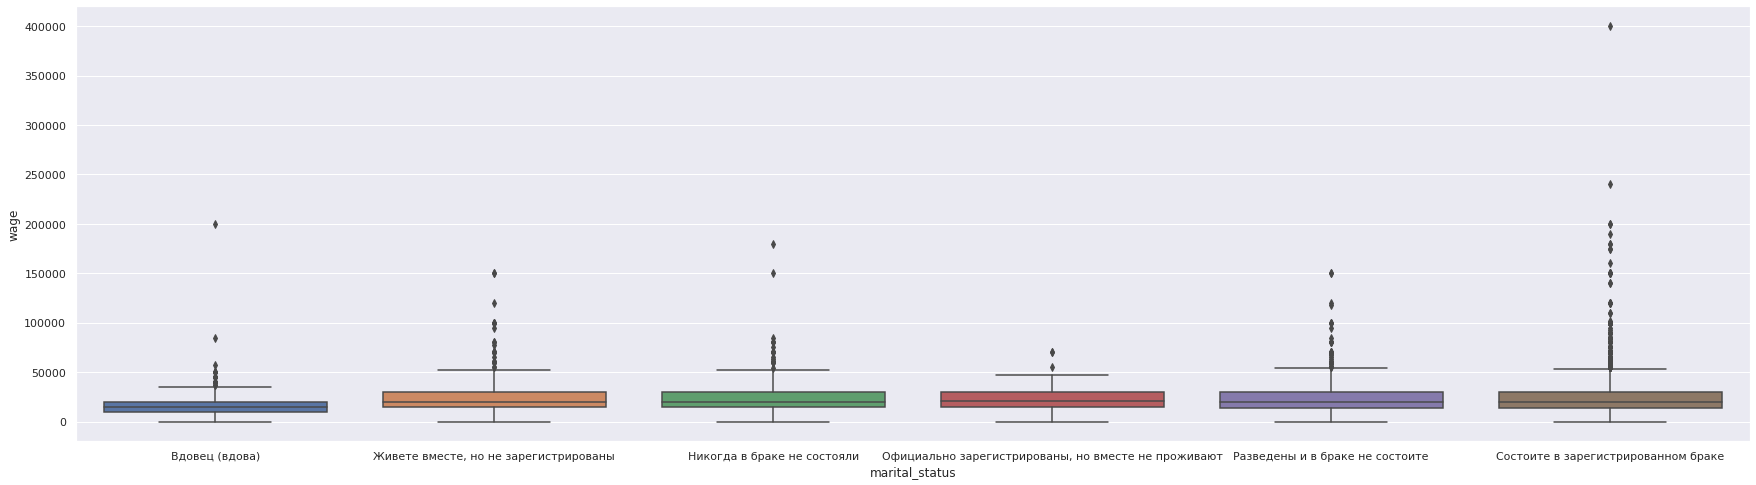

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.boxplot(x="marital_status", y="wage", data=df)

**Краткие выводы по влиянию семейного положения** `marital_status`: в среднем член сЕМьИ зарабатывает больше в сравнении с остальными группами, но на уровне медианы разница 1)нивелируется и 2)немного больше у тех, кто в браке, но не живёт вместе. Ну и наш outlier является также семьянином.  
Важный фактор, добавляющий bias - это сильная неоднородность групп. 

In [ ]:
# professional_group
df.groupby(['professional_group'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
professional_group,,,,,,,,
Военнослужащие,23.0,36739.130435,9795.487789,20000.0,29750.0,36000.0,44000.0,53000.0
Законодатели; крупные чиновники; руководители высш. и сред. звена,416.0,38301.300481,28660.275341,0.0,21375.0,30000.0,45000.0,200000.0
"Квалифицированные работники сельского, лесного хоз-ва и рыбоводства",7.0,20671.428571,15152.196132,8000.0,10000.0,13700.0,26500.0,50000.0
"Квалифицированные рабочие, занятые ручным трудом",854.0,25400.468384,13549.843716,0.0,16000.0,24000.0,30000.0,150000.0
"Квалифицированные рабочие, исп. машины и механизмы",913.0,26333.242059,15138.674173,0.0,16000.0,25000.0,31000.0,140000.0
Неквалифицированные рабочие всех отраслей,480.0,14415.672917,9012.088065,0.0,7822.5,12000.0,20000.0,70000.0
Работники сферы торговли и услуг,1153.0,18160.117953,11290.143460,0.0,10000.0,15000.0,24000.0,100000.0
Служащие офисные и по обслуживанию клиентов,424.0,20661.646226,13250.764076,0.0,12000.0,18000.0,25250.0,90000.0
Специалисты высшего уровня квалификации,1316.0,27955.828267,23713.930476,0.0,15000.0,22000.0,34700.0,400000.0


In [ ]:
#df.groupby(['professional_group']).count()

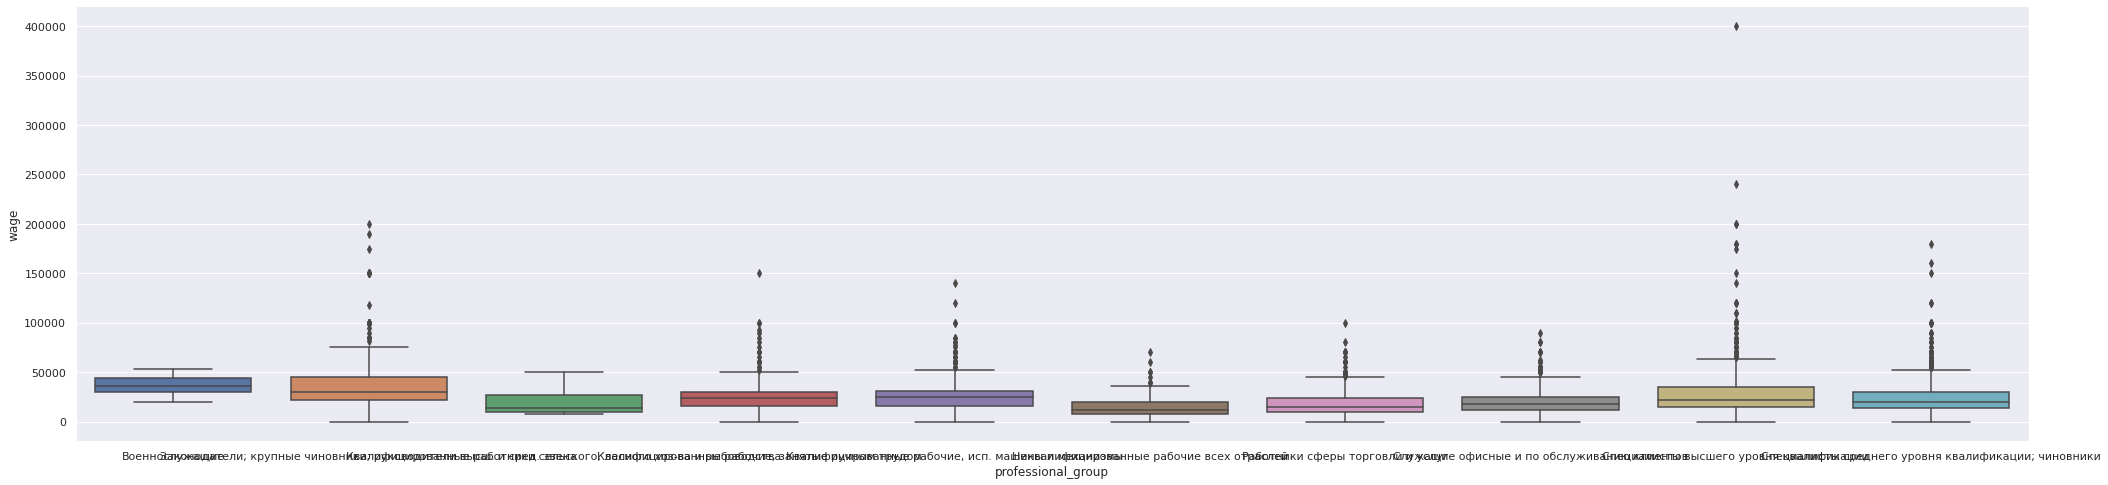

In [ ]:
sns.set(rc={'figure.figsize':(35,8)})
ax = sns.boxplot(x="professional_group", y="wage", data=df)

**Краткие выводы по влиянию проф. деятельности** `professional_group`: доблестные Слуги народа и руководители получают наиболее высокую ЗП. Интересно, что до уровня $75\%$ зарплаты практически не отличаются.  
Помимо управленцев высокий уровень и наличие outliers (видимо, уникальные специалисты) у *Специалистов высшего уровня квалификации*.

In [ ]:
# finished_education
df.groupby(['finished_education'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
finished_education,,,,,,,,
законченное высшее образование и выше,2558.0,29796.898749,23300.804813,0.0,16300.0,25000.0,35000.0,400000.0
законченное среднее образование,1973.0,21041.171313,13059.381549,0.0,12000.0,18300.0,27000.0,140000.0
законченное среднее специальное образование,1873.0,21894.596903,14193.277158,0.0,12000.0,19000.0,28000.0,150000.0
незаконченное среднее образование (7 - 8 кл),106.0,17297.169811,10786.583002,4000.0,10000.0,15000.0,22250.0,70000.0
незаконченное среднее образование (7 - 8 кл) + что-то еще,501.0,19926.706587,12318.431967,0.0,11000.0,18000.0,25000.0,90000.0
окончил 0 - 6 классов,6.0,11333.333333,7257.180352,4000.0,5500.0,9500.0,18000.0,20000.0


In [ ]:
#df.groupby(['finished_education']).count()

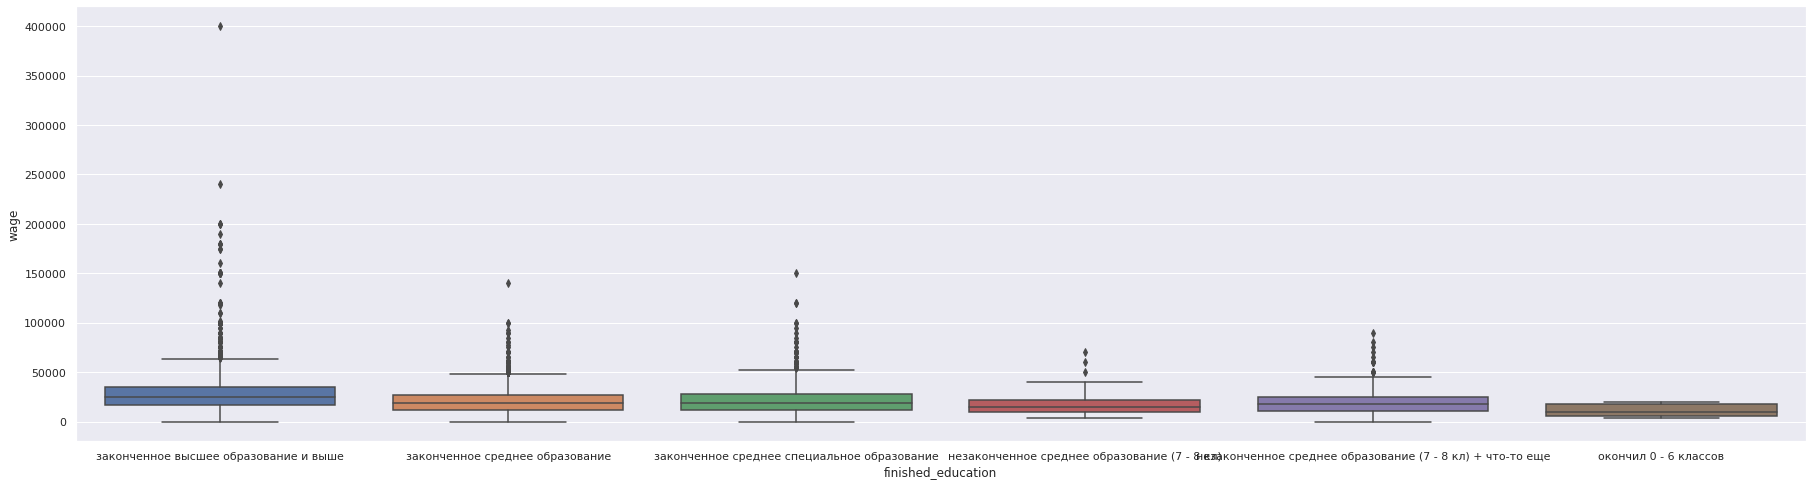

In [ ]:
sns.set(rc={'figure.figsize':(31,8)})
ax = sns.boxplot(x="finished_education", y="wage", data=df)

**Краткие выводы по влиянию уровня законченного образования** `finished_education`: респонденты с законченным высшим образованием обладают явным преимуществом, следут идут выпускники ПТУ (прикладной навык узкой специализации может быть очень востребован).

> Indented block



In [ ]:
#  industry
df.groupby(['industry'])['wage'].describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
"Армия, мвд, органы безопасности",362.0,26390.055249,16854.548380,0.0,14000.0,24000.0,35000.0,150000.0
Военно-промышленный комплекс,188.0,26398.989362,13713.775795,0.0,16500.0,25000.0,30000.0,100000.0
Гражданское машиностроение,182.0,24022.527473,13734.667521,2800.0,15000.0,21500.0,30000.0,100000.0
Другая отрасль тяжелой промышленности,226.0,26589.159292,12395.935882,3850.0,19000.0,25000.0,30000.0,90000.0
Другое,330.0,26288.521212,20905.788392,0.0,14000.0,20000.0,30000.0,175000.0
Жилищно-коммунальное хозяйство,251.0,20601.992032,14311.594105,0.0,13000.0,18000.0,25000.0,150000.0
Здравоохранение,574.0,19897.891986,15125.697223,0.0,11000.0,16000.0,25000.0,200000.0
"Легкая, пищевая промышленность",447.0,22889.968680,14941.937646,0.0,14000.0,20000.0,30000.0,100000.0
"Наука, культура",209.0,22050.028708,20377.068073,0.0,10000.0,16000.0,28000.0,180000.0


In [ ]:
#df.groupby(['industry']).count()

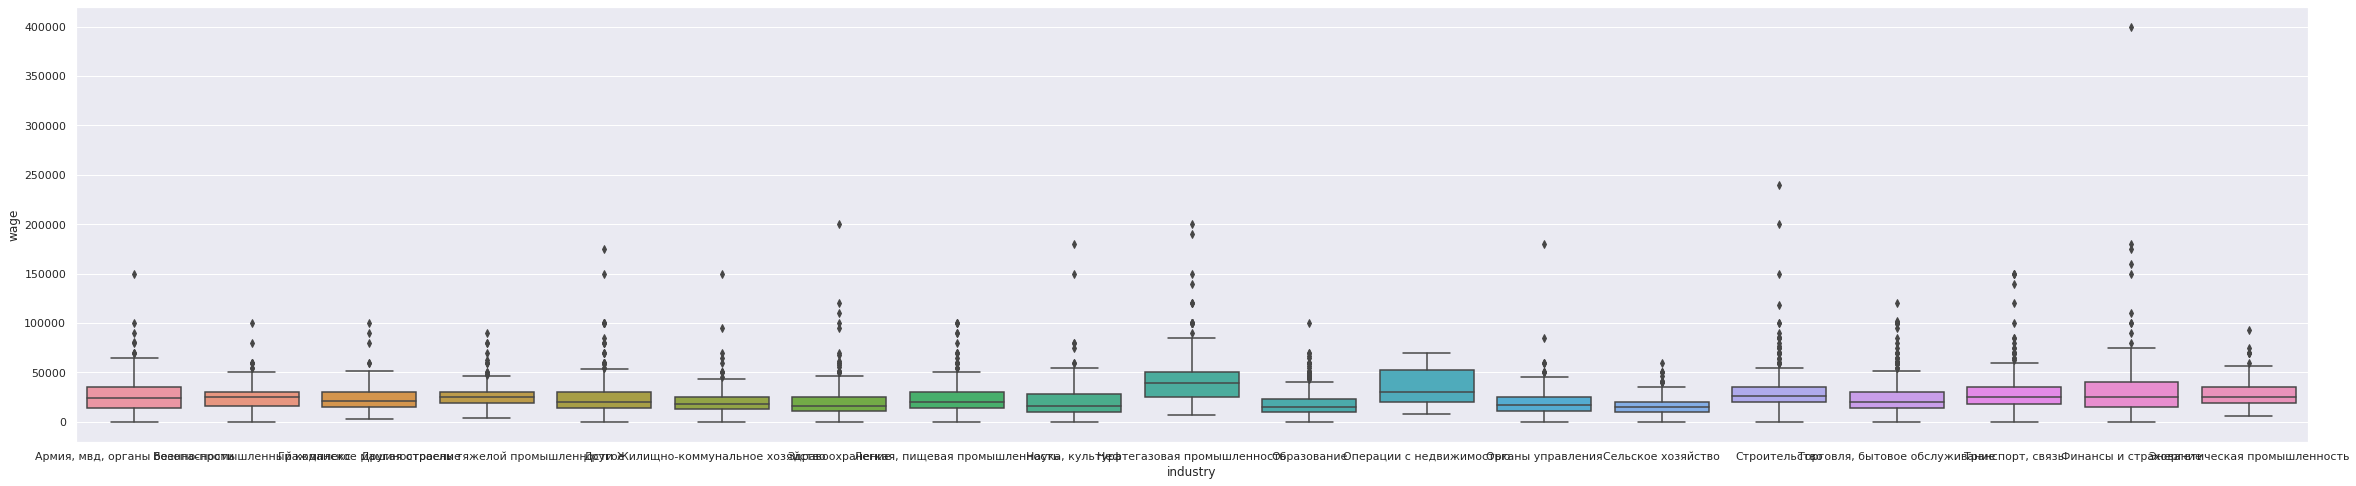

In [ ]:
sns.set(rc={'figure.figsize':(40,8)})
ax = sns.boxplot(x="industry", y="wage", data=df)

**Краткие выводы по влиянию сферы занаятости** `industry`: наш лидер работает в сфере Финансов!  
На уровне среднего лучше оплачивается Народное достояние (Нефтегазовая отрасль). Удивительно, но Риэлтор получает больше как в среднем, так и на уровне $50\%$. но при этом и максимальный уровень у Риэлтора нименьший - в долгосрочной перспективе навыки с высокой добавленной стоимостью (Финансы, Строительство, Промышленность) дают шанс на вознаграждение сильно выше среднего.

**Часть 2 (бонусная, + 50 баллов)**

- При помощи инструментов для тестирования однородности выборок проверьте влияние всех на зарплату
- Для этого нужно попарно сравить однородность всех категорий друг с другом и воспользоваться корректировкой на множественное тестирование (например, методом Бенджамини-Хохберга)
- В качестве статистического теста воспользуйтесь критерием Манна-Уитни или t-тестом
- Решение лучше реализовать через фунции, циклы итд, чтобы его можно было легко применить на каждую исследуемую переменную и на любой стат. тест
    
В качестве решения, предлагается для каждого категориального признака составить свобдную таблицу, в которой будут сопоставлены все возможные пары категориальных признаков и выведен результат тестирования гипотезы об однородности с учетом корректировки. 

Например, в таблице ниже приведен результат тестирования гипотезы о равенстве средних з/п для всех возможных пар по переменной `тип населенного пункта / town_type`. На основе этой таблицы гипотеза о равенстве средней з/п в `городах` и `поселках городского типа` не отвергается, а в остальных случаях наоборот отвергается. 

<a href="https://ibb.co/HNnjyKS"><img src="https://i.ibb.co/SQRzg6j/image.png" alt="image" border="0" width=500></a>

Если проанализровать распределения з/п в зависимости от этой переменной, то в `городах` и `поселках городского типа` распределение и медианы оказываются достаточно близки, поэтому при кодировки этих двух категорий их можно объединить в одну общую `город и ПГТ`.

<a href="https://ibb.co/vQ8tLYd"><img src="https://i.ibb.co/5nV7sFj/image.png" alt="image" border="0"></a>


Ниже идут подзаголовки для каждой переменной, которая может влиять на зарплату, просьба ими пользоваться

In [ ]:
def ft_pval(df, target, col, test=stats.mannwhitneyu):
  lst = sorted(df[col].unique().tolist())
  d = pd.DataFrame(columns=['n1', 'n2', 'x'])
  for i in range(len(lst) - 1):
    n1 = lst[i]
    x1 = df[df[col] == n1][target]
    size = len(lst) - i - 1
    col1 = np.array([n1] * size)
    col2 = np.empty(size, dtype='object')
    col3 = np.empty(size, dtype='float')
    for j in range(i + 1, len(lst)):
      n2 = lst[j]
      x2 = df[df[col] == n2][target]
      p = test(x1, x2)[1]
      col2[j - i - 1] = n2
      col3[j - i - 1] = p
    rejected, p, _, _ = multipletests(col3, 
                                            alpha = 0.05,
                                            method = 'fdr_bh') 
    col3 = p > 0.05
    d = pd.concat([d, pd.DataFrame(data={'n1':col1, 'n2':col2, 'x':col3})])
  return d


def ft_compare(df, target, col):
  d = ft_pval(df, target, col)
  a = d.pivot(index='n1', columns='n2', values='x')
  a = (a.style
    .applymap(lambda x: f"color: {'blue' if x == True else 'grey'}"))
  return a

In [1145]:
def pair_test(df, col_name, target_col):
  pairs = []
  col1 = []
  col2 = []
  tests = {}
  #d = pd.DataFrame(columns=['col1', 'col2', 'bool'])
  for i in df[col_name].unique():
    for j in df[col_name].unique():
      if (i != j) and (str(i+j) not in pairs) and (str(j+i) not in pairs):
        #values themselves
        col1.append(str(i))
        col2.append(str(j))
        #pairs of values
        pairs.append(str(i+j))
        pairs.append(str(j+i))
        #statistics
        tests[str(i+'_'+j)]= stats.mannwhitneyu(df[df[col_name] == i][target_col], df[df[col_name] == j][target_col], 
                                                alternative='greater')[1]
        pair_analysis = fdrcorrection(list(tests.values()))
        d = pd.DataFrame(data={'row':col1, 'column':col2, 'x':pair_analysis[0]})
  return d.pivot(index='row', columns='column', values='x').style.applymap(lambda x: f"color: {'blue' if x == True else 'deeppink'}")

  # за .style.applymap спасибо Василию Дергачёву. никак не получалось раскрасить ячейки)))))

In [ ]:
df_comparison = df.dropna(axis = 0)

### пол / sex

In [1146]:
pair_test_sex = pair_test(df_comparison, 'sex', 'wage')

In [1147]:
pair_test_sex

column,М
row,
Ж,False


### тип населенного пункта / town_type


In [1131]:
pair_test_tt = pair_test(df_comparison, 'town_type', 'wage')

In [1132]:
pair_test_tt

column,Город,Областной центр,Село
row,,,
Областной центр,True,nan,nan
Посёлок городского типа,False,False,True
Село,False,False,nan


### семейное положение / marital_status

In [1133]:
pair_test_ms = pair_test(df_comparison, 'marital_status', 'wage')

In [1134]:
pair_test_ms

column,Bдовец (вдова),"Живете вместе, но не зарегистрированы",Никогда в браке не состояли,Состоите в зарегистрированном браке
row,,,,
Bдовец (вдова),nan,False,False,False
Никогда в браке не состояли,nan,False,nan,False
Состоите в зарегистрированном браке,nan,False,nan,nan
разведены и_или живут отдельно,True,False,False,False


### проффессиональная группа / professional_group

In [1135]:
pair_test_pg = pair_test(df_comparison, 'professional_group', 'wage')

In [1136]:
pair_test_pg

column,Законодатели; крупные чиновники; руководители высш. и сред. звена,Квалифицированные рабочие,Неквалифицированные рабочие всех отраслей,Работники сферы торговли и услуг,Служащие офисные и по обслуживанию клиентов,Специалисты среднего уровня квалификации; чиновники
row,,,,,,
Законодатели; крупные чиновники; руководители высш. и сред. звена,nan,True,nan,nan,True,nan
Квалифицированные рабочие,nan,nan,nan,nan,True,nan
Неквалифицированные рабочие всех отраслей,False,False,nan,nan,False,False
Работники сферы торговли и услуг,False,False,True,nan,False,False
Специалисты высшего уровня квалификации,False,False,True,True,True,True
Специалисты среднего уровня квалификации; чиновники,False,False,nan,nan,True,nan


### образование / finished_education


In [1137]:
pair_test_fe = pair_test(df_comparison, 'finished_education', 'wage')

In [1138]:
pair_test_fe

column,законченное среднее образование,законченное среднее специальное образование,незаконченное среднее
row,,,
законченное высшее образование и выше,True,True,True
законченное среднее образование,nan,False,True
незаконченное среднее,nan,False,nan


### индустрия / industry

In [1139]:
pair_test_i = pair_test(df_comparison, 'industry', 'wage')

In [1140]:
pair_test_i

column,"Армия, мвд, органы безопасности",Военно-промышленный комплекс,Гражданское машиностроение,Другая отрасль тяжелой промышленности,Другое,Жилищно-коммунальное хозяйство,Здравоохранение,"Легкая, пищевая промышленность","Наука, культура",Нефтегазовая промышленность,Органы управления,Сельское хозяйство,Строительство,"Торговля, бытовое обслуживание","Транспорт, связь",Финансы и страхование,Энергетическая промышленность
row,,,,,,,,,,,,,,,,,
"Армия, мвд, органы безопасности",nan,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,False
Военно-промышленный комплекс,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,False
Гражданское машиностроение,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,False
Другая отрасль тяжелой промышленности,nan,False,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,False
Другое,False,False,False,False,nan,True,nan,True,nan,False,True,True,False,True,False,False,False
Жилищно-коммунальное хозяйство,False,False,False,False,nan,nan,nan,nan,nan,False,False,True,False,False,False,False,False
Здравоохранение,False,False,False,False,False,False,nan,False,False,False,False,True,False,False,False,False,False
"Легкая, пищевая промышленность",False,False,False,False,nan,False,nan,nan,nan,False,True,True,False,False,False,False,False
"Наука, культура",False,False,False,False,False,False,nan,False,nan,False,False,True,False,False,False,False,False


## Кодировка категориальных признаков

Для построения линейной регрессии категориальные колонки предстоит закодировать с помощью one-hot-encoding. Для этого необходимо:
- для каждой категориальной колонки выбрать базовую категорию (относительно которой будет анализироваться влияние), **+**
- удалить из анализа те категории, в которые попало слишком мало наблюдений (выбрать на ваше усмотрение такие категории), либо укрупнить их в собирательную категорию "иное" **+**
- исходя из анализа в предыдущемм задании выбрать близкие по смыслу категории и крупнить (если гипотеза об их однородности не отвергается или если вы пришли к этому через визуальный анализ) **+**
- те переменные, которые мало влияют на зарплату, можно не кодировать и не включать в итоговый датасет **+**


####Удаление или укрупнение редких категорий

In [ ]:
#marital_status = documented but do not live together 
mask = (df['marital_status'] == 'Официально зарегистрированы, но вместе не проживают') | (df['marital_status'] == 'Разведены и в браке не состоите')
df['marital_status'] = np.where(mask, 'разведены и_или живут отдельно', df.marital_status)

In [ ]:
# professional_group = agriculture & military (exclude) - первых как и вторых очень мало, объединить в одну группу - всё равно слишком мало наблюдений; 
# при этом в случае с военнослужащими карьерная лестница "менее рыночная", поэтому их зарплаты определяются, вообще говоря, иными критериями.
df = df.drop( df[
                  (df['professional_group'] == 'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства') |
                  (df['professional_group'] == 'Военнослужащие')
                  ].index)

In [ ]:
# professional_group = skilled workers. объединим в одну категорию, т.к 1) VIF-тест ниже показал высокую зависимость в т.ч между этими признаками,
# т.е либо руками работаешь, либо на аппарате и 2) показатели зарплат у этих категорий очень слабо различимы
mask = (df['professional_group'] == 'Квалифицированные рабочие, занятые ручным трудом') | \
        (df['professional_group'] == 'Квалифицированные рабочие, исп. машины и механизмы')

df['professional_group'] = np.where(mask, 'Квалифицированные рабочие', df.professional_group)

In [ ]:
# finished education = (0-6) + (7-8) + (7-8&sth_else)
mask = (df['finished_education'] == 'незаконченное среднее образование (7 - 8 кл)') | \
        (df['finished_education'] == 'незаконченное среднее образование (7 - 8 кл) + что-то еще') | \
        (df['finished_education'] == 'окончил 0 - 6 классов')

df['finished_education'] = np.where(mask, 'незаконченное среднее', df.finished_education)

In [ ]:
# industry - риэлторские услуги представляют очень мало наблюдений. в группу Торговля их некорректно добавлять - остаётся группа Другое.
mask = (df['industry'] == 'Операции с недвижимостью')
df['industry'] = np.where(mask, 'Другое', df.industry)

####One-hot encoding

In [ ]:
# "drop_first=True" , чтобы не было линейной зависимости
one_hot = pd.get_dummies(df[['town_type', 'professional_group', 'finished_education', 'marital_status', 'sex', 'industry']], drop_first=True)

In [ ]:
df_1 = pd.concat([ one_hot, df[['population', 'age', 'wage']] ], axis=1, join='inner')

df_1.head()

,town_type_Областной центр,town_type_Посёлок городского типа,town_type_Село,professional_group_Квалифицированные рабочие,professional_group_Неквалифицированные рабочие всех отраслей,professional_group_Работники сферы торговли и услуг,professional_group_Служащие офисные и по обслуживанию клиентов,professional_group_Специалисты высшего уровня квалификации,professional_group_Специалисты среднего уровня квалификации; чиновники,finished_education_законченное среднее образование,...,industry_Органы управления,industry_Сельское хозяйство,industry_Строительство,"industry_Торговля, бытовое обслуживание","industry_Транспорт, связь",industry_Финансы и страхование,industry_Энергетическая промышленность,population,age,wage
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,12187,43.0,40000.0
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,12187,61.0,28000.0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,12187,32.0,NaN
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12187,30.0,NaN
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12187,72.0,NaN


####Удалим NaN и выбросы

In [ ]:
df_1.wage.quantile(0.03)

5500.0

In [ ]:
df_1 = df_1[(df_1.wage > 0) & (df_1.wage < df_1.wage.quantile(0.99) ) & (df_1.wage > 4000)].dropna(axis = 0).reset_index(drop = True)

In [ ]:
df_1.shape

(6758, 37)

Хотя потеряно много данных, даже сейчас на одну переменную приходится $\approx 170$ наблюдений.

## Линейная регрессия

- Убедитесь, что все данные готовы и постройте линейную регрессию
- Проанализируйте результаты регрессии
- Соотносятся ли результаты регрессии с разведывательным анализом данных ранее?


####Есть ли мультиколлинеарность

In [ ]:
#df_1.corr()

Можно проверить мультиколлинеарность (aka взаимозависиомсть по коррелограмме, но, к счастью, есть формальный признак, позволяющий определить, какие переменные связаны линейной зависимостью: [VIF-test](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc), который расчитывается как $VIF_i = \dfrac{1}{1-R_i^2}$.  
**Rule of thumb**: если $VIF > 5$, тогда мультиколлинеарность есть. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_1.drop(columns = 'wage').columns
x_vals = df_1.drop(columns = 'wage').values
vif_data["VIF"] = [variance_inflation_factor(x_vals, i) for i in range(len(vif_data["feature"]))]

In [ ]:
vif_data

,feature,VIF
0,town_type_Областной центр,2.904012
1,town_type_Посёлок городского типа,1.217787
2,town_type_Село,1.814859
3,professional_group_Квалифицированные рабочие,5.806236
4,professional_group_Неквалифицированные рабочие...,2.195668
5,professional_group_Работники сферы торговли и ...,3.626156
6,professional_group_Служащие офисные и по обслу...,1.907725
7,professional_group_Специалисты высшего уровня ...,3.892294
8,professional_group_Специалисты среднего уровня...,3.942009
9,finished_education_законченное среднее образов...,2.714568


Согласно вышеупомянотому **rule of thumb** присутствует связь между  
**1)** Квалифицированными работниками;  
**2)** Возрастом;  
**3)** Наличием зарегистрированного брака.  

Ожидаемо, что с возрастом skill растёт, также как и взгляды становятся консервативнее: жена-дети-дача, aka стабильность. При этом исключать ни одну из этих категорий не хотелось бы, так как по своей сути они дают разную информацию, влияющую на ЗП.

####Перейдём к самой регрессии

In [ ]:
X = df_1.drop('wage', axis = 1) #, 'age', 'population'
ln_y = np.log(df_1.wage) #на первичном этапе оценки выяснили, что log_wage распределён нормально (ну почти), поэтому считаем ln_y

####Молодые люди, скалирование не забываем!

In [ ]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler() 
#scal.fit_transform(X)
X_scal = pd.DataFrame(scal.fit_transform(X))
type(X_scal)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(X, ln_y) # linear model fit based on the train sample

In [ ]:
print('R^2 =', round(mod1.score(X, ln_y), 3))

R^2 = 0.37


In [ ]:
import statsmodels.api as sm

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(ln_y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:49:05   Log-Likelihood:                -4171.9
No. Observations:                6758   AIC:                             8418.
Df Residuals:                    6721   BIC:                             8670.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Корректность линейной регрессии

Проверьте корректность линейной регрессии (предпосылки теоремы Гаусса-Маркова) подобно тому, как мы это делали на семинаре. Анализируя остатки регрессии, можно также использовать дополнительные тесты на ваше усмотрение.

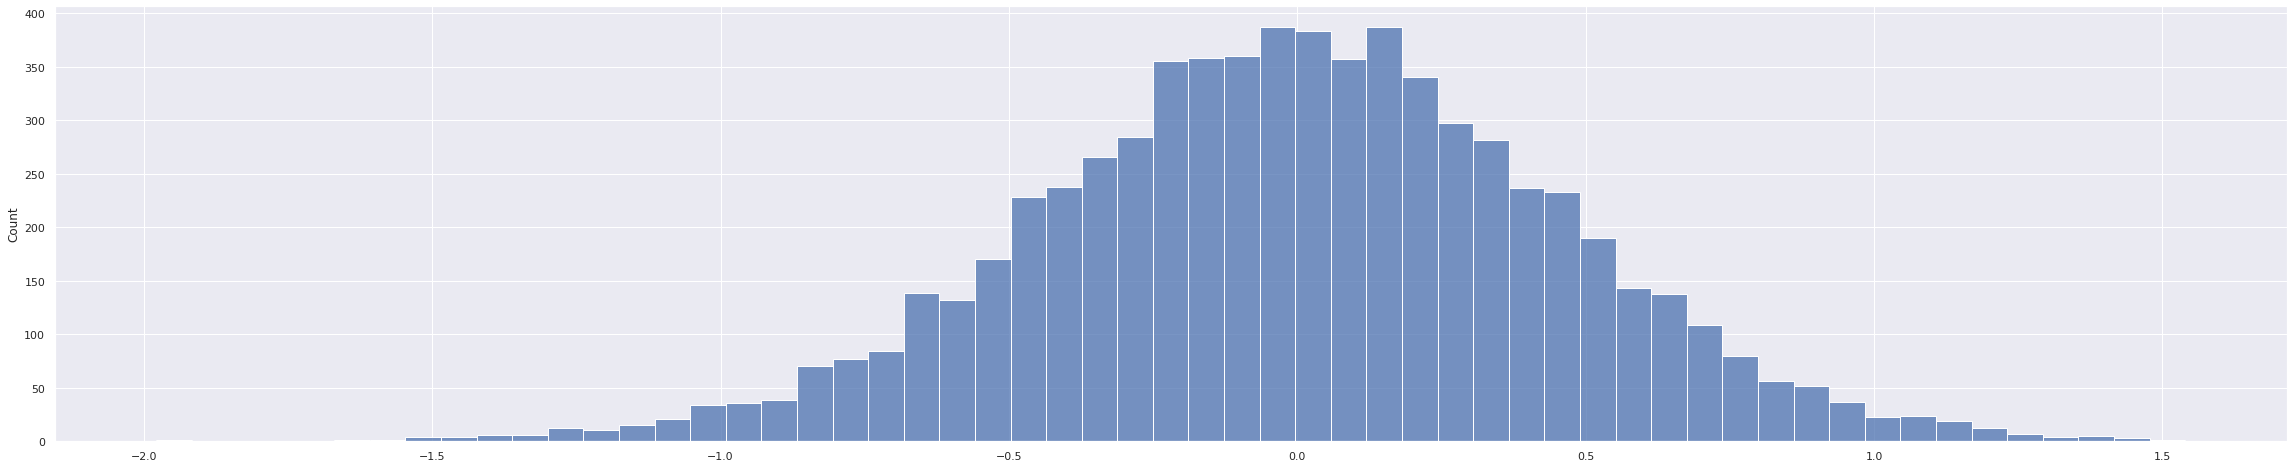

In [ ]:
sns.histplot(model.resid);

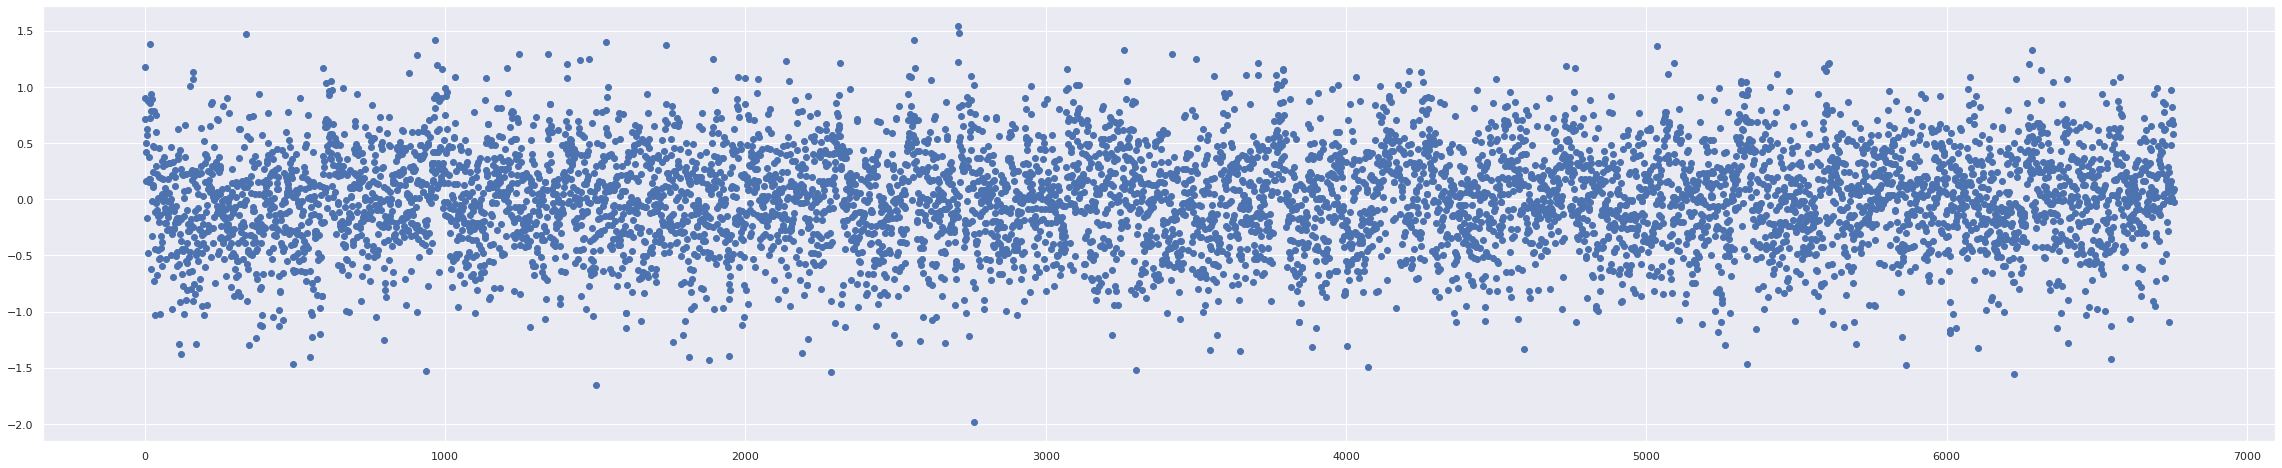

In [ ]:
plt.plot(model.resid, 'o');

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.999, p=0.003


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
k2, p = stats.normaltest(model.resid)

print(k2, p)

15.449987251855767 0.0004416496550031394


In [ ]:
stats.chisquare(model.resid)

Power_divergenceResult(statistic=1244461697438.4253, pvalue=0.0)

Residuals внешне как будто нормальные, но стат. тесты говорят об обратном.

- Есть ли в остатках __автокоррелированность__?

Для проверки этой предпосылки смотрим критерий `Durbin-Watson`. Если она оказывается в районе двух (При грубой оценке считают, что если Автокорреляция остатков модели $1.5 < d < 2.5$, то автокорреляция остатков отсутствует), то автокоррелированности в остатках нет.  

Наш случай: `Durbin-Watson` = 1.603.

- Есть ли в остатках __гетероскедастичность__?

Для гетероскедастичности построим картинку и воспользуемся каким-нибудь критерием. 

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(model.resid, X.values)

(122.62833704350963,
 2.2209866262077518e-11,
 3.450300965851743,
 1.6836942594801583e-11)

Видим, что `pvalue` (последнее значение) сильно ниже уровня значимости. **Гипотеза о гомоскедастичности отвергается**.

In [ ]:
#fit linear regression model
model = sm.OLS(ln_y, X).fit(cov_type='HC3')

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     97.54
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:49:08   Log-Likelihood:                -4171.9
No. Observations:                6758   AIC:                             8418.
Df Residuals:                    6721   BIC:                             8670.
Df Model:                          36                                         
Covariance Type:                  HC3                                         
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 35
  'rank is %d' % (J, J_), ValueWarning)


- Уравнение значимо в целом, значение F-статистики попадает глубоко в хвост 
- Краткие итоги: мужчины всё-таки зарабатывают больше; отсутствие высшего образования негативно сказывается на уровне ЗП; жизнь в ПГТ или Райцентре позволяет зарабатывать *больше* в сравнении с городом (меньше конкуренция на места с высокой добавленной стоимостью).

**Что плохо:** низкая объясняющая способность модели ($R^2 \approx 34\%$) и, как следствие, большой разброс.  
Что может помочь: комбинация имеющихся признаков (их произведение), ну и знание предметной области.  

---

